# Lesson 11: Image Captioning

- In the classroom, the libraries are already installed for you.
- If you would like to run this code on your own machine, you can install the following:

```
    !pip install transformers
```

- Here is some code that suppresses warning messages.

In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

import warnings
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")

- Load the Model and the Processor.

In [2]:
from transformers import BlipForConditionalGeneration

In [3]:
model = BlipForConditionalGeneration.from_pretrained(
    "./models/Salesforce/blip-image-captioning-base")

Info about [Salesforce/blip-image-captioning-base](https://huggingface.co/Salesforce/blip-image-captioning-base)

In [4]:
from transformers import AutoProcessor

In [5]:
processor = AutoProcessor.from_pretrained(
    "./models/Salesforce/blip-image-captioning-base")

- Load the image.

In [6]:
from PIL import Image

In [7]:
image = Image.open("./beach.jpeg")

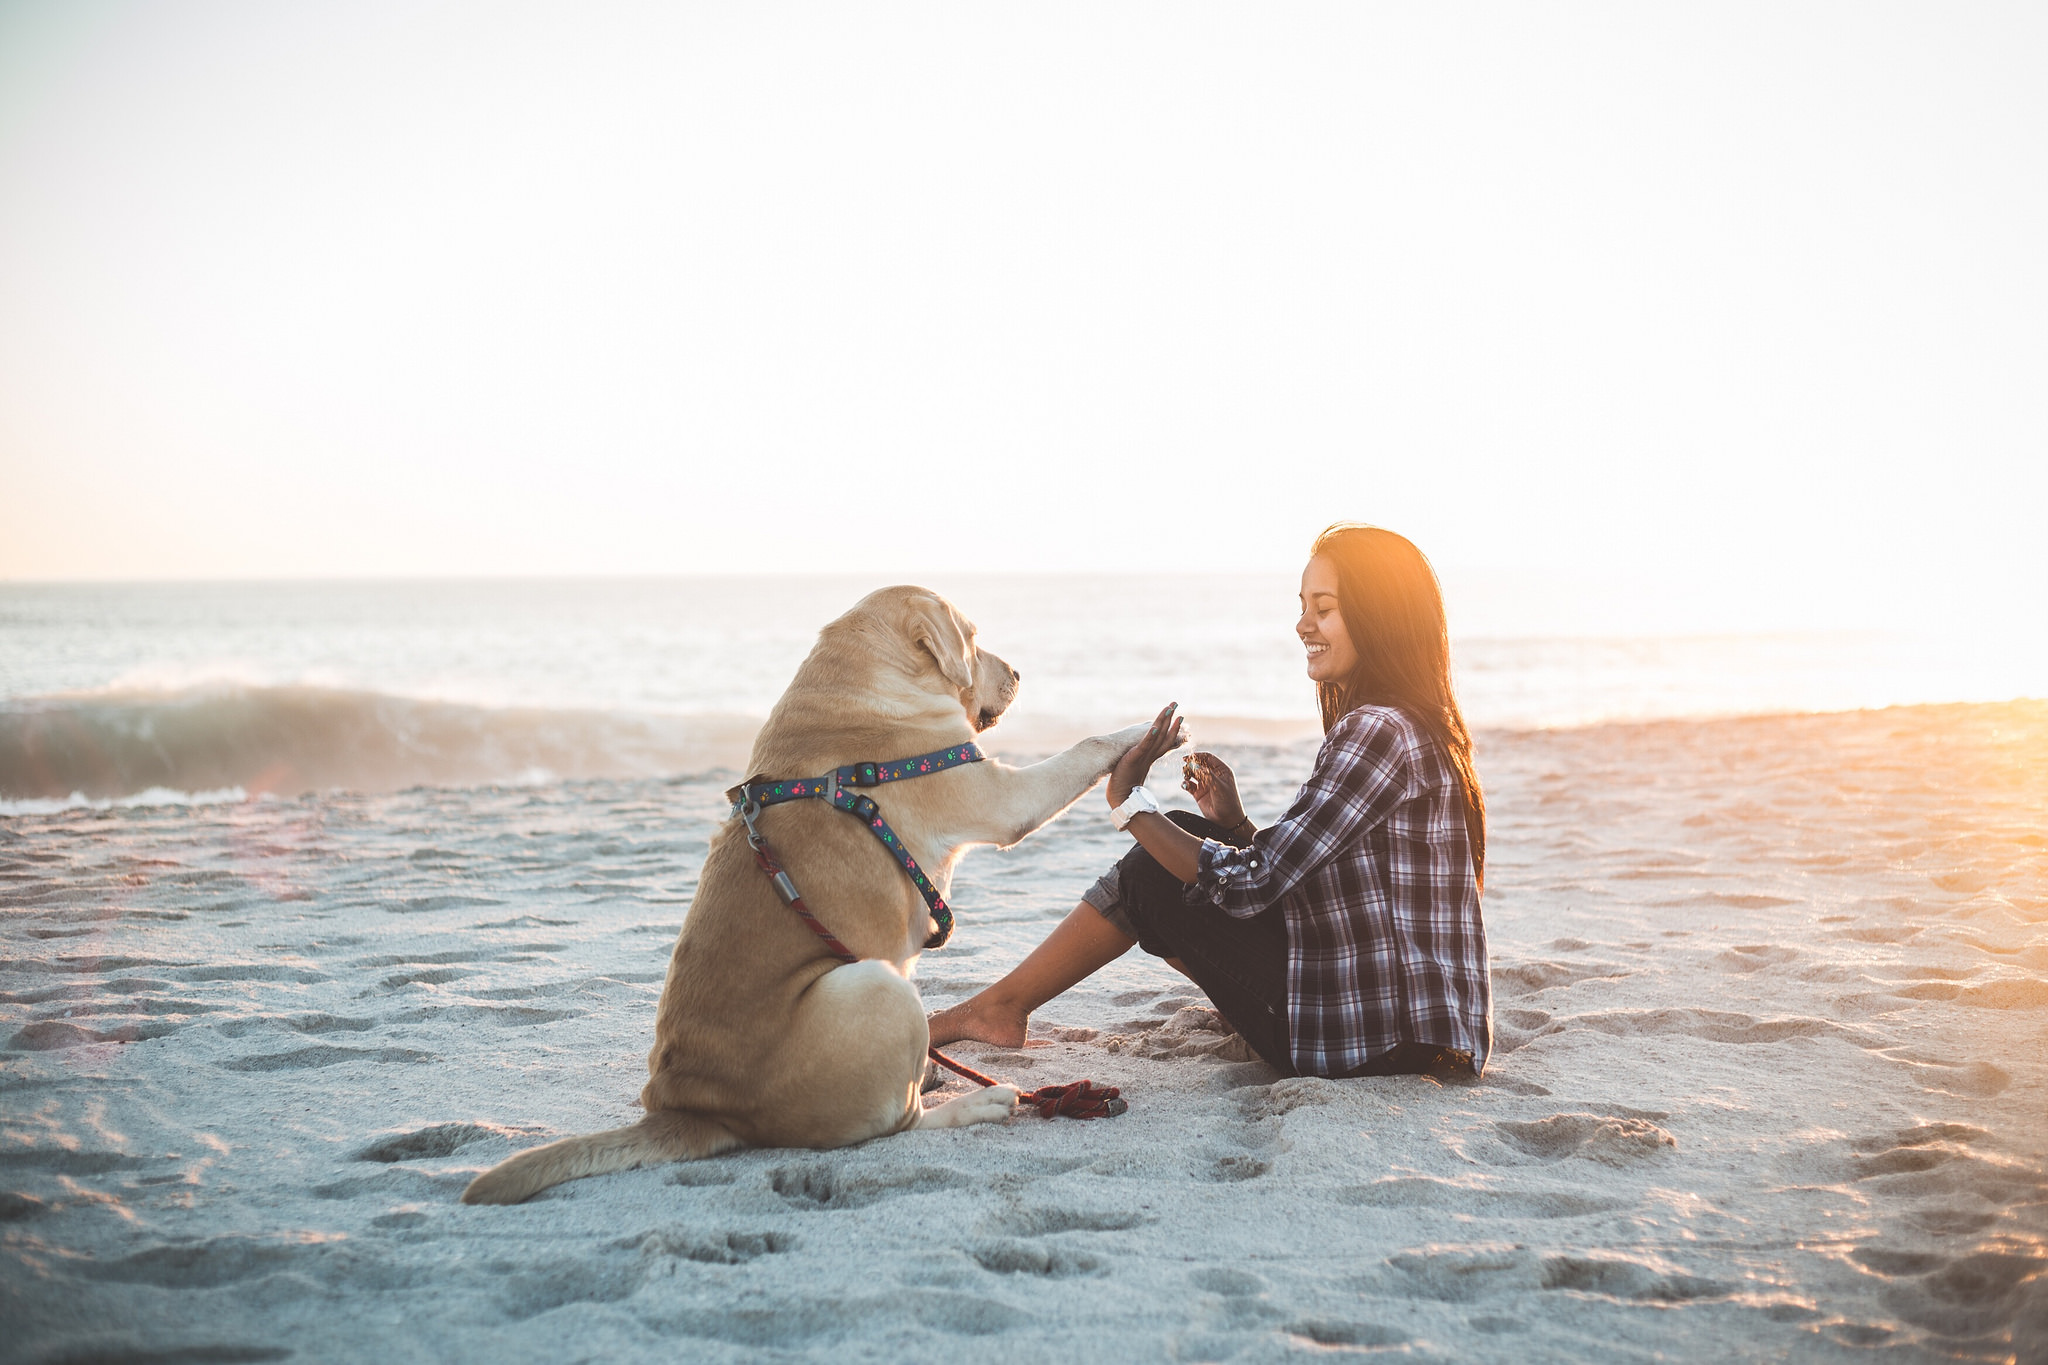

In [8]:
image

### Conditional Image Captioning

In [9]:
text = "a photograph of"
inputs = processor(image, text, return_tensors="pt")

In [10]:
inputs

{'pixel_values': tensor([[[[ 0.8647,  0.9230,  0.9376,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9084,  0.9376,  0.9522,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9376,  0.9376,  0.9668,  ...,  1.7552,  1.7552,  1.7552],
          ...,
          [-0.7850, -0.7850, -0.7266,  ..., -0.3178, -0.2740, -0.3616],
          [-0.7558, -0.7558, -0.7412,  ..., -0.3178, -0.3616, -0.4346],
          [-0.7558, -0.7704, -0.7850,  ..., -0.3616, -0.4346, -0.4784]],

         [[ 1.2194,  1.2495,  1.2795,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2344,  1.2645,  1.2945,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2495,  1.2795,  1.3095,  ...,  1.8948,  1.8948,  1.8948],
          ...,
          [-0.5965, -0.5965, -0.5515,  ..., -0.4014, -0.3264, -0.4164],
          [-0.5665, -0.5665, -0.5515,  ..., -0.3864, -0.4164, -0.4914],
          [-0.5665, -0.5815, -0.5965,  ..., -0.4164, -0.4764, -0.5365]],

         [[ 1.2927,  1.3211,  1.3496,  ...,  1.9753,  1.9753,  1.9753],
          [ 1

In [11]:
out = model.generate(**inputs)

In [12]:
out

tensor([[30522,  1037,  9982,  1997,  1037,  2450,  1998,  2014,  3899,  2006,
          1996,  3509,   102]])

In [13]:
print(processor.decode(out[0], skip_special_tokens=True))

a photograph of a woman and her dog on the beach


### Unconditional Image Captioning

In [14]:
inputs = processor(image,return_tensors="pt")

In [15]:
out = model.generate(**inputs)

In [16]:
print(processor.decode(out[0], skip_special_tokens=True))

a woman sitting on the beach with her dog


### Try it yourself! 
- Try this model with your own images and texts!